# Документация

* книжка - в телеграмм канале
* [Официальный сайт](http://pandas.pydata.org)
* [Шпаргалка](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


## Import

In [1]:
import pandas as pd

Pandas - таблицы "на максималках". Очень похоже на работу с Excel, только из программного кода, а не мышкой тыкать.
Нужны, если у вас есть данные (в виде таблиц, в разных форматах). Эти данные "грязные" (неполные, тип может меняться от ячейки к ячейки).

![Таблицы и термины](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png)

TODO: нарисовать картинку, а не брать с geeksforgeeks.org

* row - строка
* column - столбец
* data - данные
* Axis - оси (строки - это ось 0, столбцы - ось 1)
* Index label - номер строки **данных** (начинается с 0, название столбца не является строкой, потому что это не данные)
* Column name - заголовки столбцов
* Серия - это один столбец данных


In [4]:
# создание и печать таблицы. Проще не бывает.
import pandas as pd

# initialise data of lists.
data = {'Name':['Tom', 'nick', 'krish', 'jack'], 'Age':[20, 21, 19, 18]}

# Create DataFrame
df = pd.DataFrame(data)

# Print the output.
print(df)

    Name  Age
0    Tom   20
1   nick   21
2  krish   19
3   jack   18


# Чтение данных (получаем DataFrame)

|   |   |   |   |   |
|----|----|----|----|----|
| read_excel | read_csv | read_parquet | read_pickle | read_clipboard |
| read_feather | read_json | read_html | read_hdf | read_gbq |
| read_fwf | read_orc | read_sas | read_spss | read_sql |
| read_sql_query | read_sql_table | read_stata | read_table | read_xml |

![from_tutorial](https://pandas.pydata.org/pandas-docs/stable/_images/02_io_readwrite.svg)

## Excel

`pd.read_excel(path, sheet_name=None)`

Путь

* абсолютный
  * `'c:\\natasha\\data\\оценки.xlsx'`
  * `/home/natasha/data/оценки.xlsx'`
* относительный
  * `'оценки.xlsx'`
  * `'data\\оценки.xlsx'`
  * `'..\\data\\оценки.xlsx'`

Raw-строки
`r'c:\natasha\data\оценки.xlsx'`

В файле листы 6А, 6Б, 6В, 6Г

| sheet_name | значение |
|----|----|
| '6Б' | имя листа |
| 2 | номер листа (с нуля) |
| -1 | последний лист |
| `[0, '6Б']` | первый лист и лист с именем '6Б' |
| `None` | **все листы** |

Получаем словарь

* ключ (хешируемое значение) - "название" листа при чтении
* значение - таблица данных





In [ ]:
pd.read_excel('data_files/оценки.xlsx')

Можно в google colab скопировать путь к файлу и указать его в path.

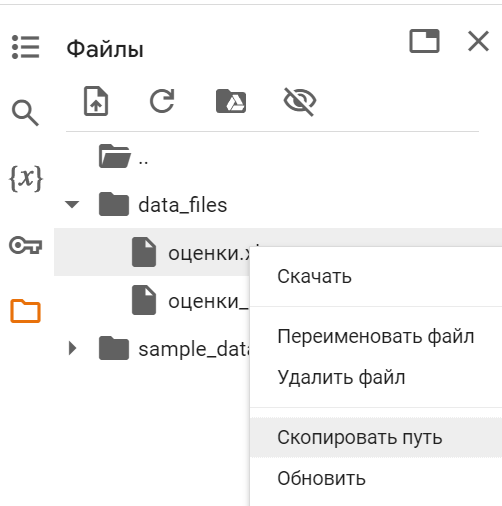

In [ ]:
# открыть контекстное меню файла и выбрать Скопировать путь
pd.read_excel('/content/data_files/оценки.xlsx')

In [ ]:
pd.read_excel('data_files/оценки.xlsx', sheet_name='6Г')

In [13]:
marks = pd.read_excel('data_files/оценки.xlsx', sheet_name=[0, '6Г'])
marks

{0:                              ФИО      Пол  Математика  Русский язык  \
 0  Суханова Маргарита Богдановна  женский           3             3   
 1   Лаврентьев Давид Анатольевич  мужской           3             3   
 2    Винниченко Дарья Максимовна  женский           4             5   
 
    Литература  Физика  История  Физическая культура  
 0           3       3        3                    5  
 1           3       5        3                    3  
 2           5       3        4                    5  ,
 '6Г':                              ФИО      Пол  Математика  Русский язык  \
 0   Елизарова Вероника Семеновна  женский           5             5   
 1  Белякова Анастасия Васильевна  женский           4             5   
 2    Иванова Галина Вячеславовна  женский           4             4   
 3   Потапов Руслан Александрович  мужской           3             3   
 
    Литература  Физика  История  Физическая культура  
 0           5       5        5                    4  
 1      

In [14]:
# как задавали при чтении, так к листу и обращаемся
marks[0]

,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
0,Суханова Маргарита Богдановна,женский,3,3,3,3,3,5
1,Лаврентьев Давид Анатольевич,мужской,3,3,3,5,3,3
2,Винниченко Дарья Максимовна,женский,4,5,5,3,4,5


In [15]:
marks['6Г']

,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
0,Елизарова Вероника Семеновна,женский,5,5,5,5,5,4
1,Белякова Анастасия Васильевна,женский,4,5,5,5,4,3
2,Иванова Галина Вячеславовна,женский,4,4,4,3,4,5
3,Потапов Руслан Александрович,мужской,3,3,3,4,3,4


In [16]:
# такого ключа нет
marks[1]

KeyError: 1

In [17]:
marks.keys()

dict_keys([0, '6Г'])

## CSV

Из excel формата **один** лист можно сохранить в csv формат.

При чтении можно указать разделитель. По умолчанию запятая.

`read_csv(path, delimiter=',', header=0)`

Параметры:

* `delimiter` или `sep` - строка-разделитель
* `header` - номер строки, в которой указаны заголовки данных;
    * `None` - если в файле данные без заголовков, тогда заголовки будут равны индексам: 0, 1, 2 и тд.
* `names` - список заголовков (column labels), которые будут присвоены данным. Если в файле уже были указаны заголовки, то names в приоритете.

Разделители:

* `','` - по умолчанию
* `';'`
* `' '` - пробел
* `'\t'` - табуляция

```
ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
Большакова Ольга Захаровна,женский,4,5,5,4,5,5
Михайлов Артем Артемович,мужской,5,5,5,4,4,4
Афанасьев Леонид Артурович,мужской,4,4,3,4,3,5
Козлов Николай Артёмович,мужской,3,4,4,4,3,5
Крылова Марина Сергеевна,женский,5,5,4,4,4,5
```

In [ ]:
pd.read_csv('data_files/оценки 6Д.csv')

```
ФИО;Пол;Математика;Русский язык;Литература;Физика;История;Физическая культура
Большакова Ольга Захаровна;женский;4;5;5;4;5;5
Михайлов Артем Артемович;мужской;5;5;5;4;4;4
Афанасьев Леонид Артурович;мужской;4;4;3;4;3;5
Козлов Николай Артёмович;мужской;3;4;4;4;3;5
Крылова Марина Сергеевна;женский;5;5;4;4;4;5
```

In [22]:
# без указания разделителя читается плохо
pd.read_csv('data_files/оценки 6Д_2.csv', delimiter=';')

,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
0,Большакова Ольга Захаровна,женский,4,5,5,4,5,5
1,Михайлов Артем Артемович,мужской,5,5,5,4,4,4
2,Афанасьев Леонид Артурович,мужской,4,4,3,4,3,5
3,Козлов Николай Артёмович,мужской,3,4,4,4,3,5
4,Крылова Марина Сергеевна,женский,5,5,4,4,4,5


In [4]:
# Читаем файл данных, без заголовков, например, матрица для numpy
df = pd.read_csv('pandas_data/matrix.csv', sep=';')
df

,tfrtk01,lajh03ft,1023
0,tfrtk02,aj3jhl1z,1024
1,tfrtk03,0qehar5q,1025
2,tfrtk04,p365batf,1026


In [6]:
# Видно, что первая строка не заголовок, а тоже часть данных; укажем, что заголовка в файле данных нет
df = pd.read_csv('pandas_data/matrix.csv', sep=';', header=None)
df

,0,1,2
0,tfrtk01,lajh03ft,1023
1,tfrtk02,aj3jhl1z,1024
2,tfrtk03,0qehar5q,1025
3,tfrtk04,p365batf,1026


In [8]:
# назовем полученные колонки login, password, user_id
df = pd.read_csv('pandas_data/matrix.csv', sep=';', header=None, names=['login', 'password', 'user_id'])
df

,login,password,user_id
0,tfrtk01,lajh03ft,1023
1,tfrtk02,aj3jhl1z,1024
2,tfrtk03,0qehar5q,1025
3,tfrtk04,p365batf,1026


## HTML

In [ ]:
run = pd.read_html('https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D0%B3_%D0%BD%D0%B0_100_%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2')
run

In [ ]:
run[3]

## JSON

`read_json(путь)`

```json
[
    {
        "name": "Земов Георгий Ильич",
        "year": 2023,
        "month": "октябрь",
        "group": "310",
        "discipline": "физика ",
        "lessontype": "упр",
        "grade": "2"
    }
]
```

In [25]:
pd.read_json('data_files/grades.json')

,name,year,month,group,discipline,lessontype,grade
0,Санчурский Максим Александрович,2023,сентябрь,310,иностранный язык,упр,1
1,Бербенев Андрей Владимирович,2023,ноябрь,310,физическая культура и спорт,упр,2
2,Чилин Александр Андреевич,2023,октябрь,310,математика,упр,0
3,Бирюков Кирилл Вячеславович,2023,сентябрь,310,информатика (часть 1),лаб,1
4,Земов Георгий Ильич,2023,октябрь,310,физика,упр,2


# Путь к файлу

* [Работа с файлами в google colab](https://neptune.ai/blog/google-colab-dealing-with-files)
* [Import google sheets to pandas](https://skills.ai/blog/import-google-sheets-to-pandas/)

Возможности:

* взаимодействие с локальной файловой системе на вашем компьютере через `%` или `!` команды терминала.
    * `!echo hello > qqq.csv` - создать в текущей директории файл qqq.csv
    * `!git clone https://github.com/tatyderb/python_express_course.git` - клонировать репозиторий
    * `!wget https://raw.githubusercontent.com/tatyderb/python_myanmar/refs/heads/master/lectures/pandas_data/grades.json`  - если есть команда wget + нужно передать URL для **raw** представления файла.
* c github - подставляем URL для Raw файла во все функции (чтения), где нужен путь к файлу.
* upload / download файла средствами google colab
    * **Загруженные файлы хранятся во время сессии, а потом их надо загружать заново!**
* Доступ к локальной файловой системе через `google.colab.files` (upload, download)
    * `files.upload_file()` - загружаем один файл, дальше с ним работаем по его имени
    * `files.upload()` - загружаем несколько файлов, дальше с файлами работаем по их имени
    * `files.download('/content/sample_data/anscombe.json')` - путь к файлу начинается с `/content`, сохраняет в Downloads (или куда настроили браузер).
* Доступ к GoogleSheet (с предварительной конвертацией в CSV) 
* Доступ к Google Drive
    * `from google.colab import drive`
    * `drive.mount('/content/gdrive')`
    * `pd.read_json('/content/gdrive/MyDrive/Colab Notebooks/grades.json')` - на Google Drive в директории "Colab Notebooks" файл grades.json
* Авторизация
* Открытие google sheet

In [12]:
# можно подставить в путь URL, для github не забудьте, что путь к raw представлению файла. Показать откуда брать урл.
df = pd.read_json('https://raw.githubusercontent.com/tatyderb/python_myanmar/refs/heads/master/lectures/pandas_data/grades.json')
df

,name,year,month,group,discipline,lessontype,grade
0,Санчурский Максим Александрович,2023,сентябрь,310,иностранный язык,упр,1
1,Бербенев Андрей Владимирович,2023,ноябрь,310,физическая культура и спорт,упр,2
2,Чилин Александр Андреевич,2023,октябрь,310,математика,упр,0
3,Бирюков Кирилл Вячеславович,2023,сентябрь,310,информатика (часть 1),лаб,1
4,Земов Георгий Ильич,2023,октябрь,310,физика,упр,2


## Команды терминала через % или !

Работайте через `%` с "line-magic" или с `!` команды терминала (зависит от того, из какого терминала запускали). В google colab - bash.

* `!ls` будет работать в linux, но не будет, если запускали из `cmd` в Windows.
* `!dir` будет работать в Windows
* `%ls` будет работать и в Windows, и в Unix

In [3]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is F8DB-A39C

 Directory of C:\work\courses_my\_python_myanmar\lectures

11/14/2024  10:29 PM    <DIR>          .
05/09/2024  04:23 PM    <DIR>          ..
11/14/2024  08:49 PM    <DIR>          .ipynb_checkpoints
02/16/2024  01:35 PM    <DIR>          .pytest_cache
04/19/2024  11:21 AM           128,480 1_2_advanced_plot.ipynb
04/19/2024  01:09 PM           802,541 1_3D_plot.ipynb
04/19/2024  12:41 PM           583,775 1_simple_plot.ipynb
03/29/2024  01:20 AM           185,062 2_1.ipynb
04/13/2024  07:19 PM            23,664 3_1_sympy.ipynb
04/13/2024  07:43 PM            20,419 3_2_sympy_solve.ipynb
04/13/2024  07:43 PM            31,099 3_3_sympy_integral.ipynb
10/14/2024  02:16 PM            12,278 abc.ipynb
11/06/2024  11:56 PM    <DIR>          argparse_test
11/07/2024  02:49 PM            26,891 click.md
03/22/2024  09:46 PM    <DIR>          data
10/10/2024  07:01 PM            29,479 dataclass.ipynb
05/28/2024  11:22 AM   

In [10]:
# Создаем файл на локальном диске
!echo '1' > qqq.csv

In [6]:
# если есть команда wget, то скачается и сохранится в текущей директории файл grades.json
!wget https://raw.githubusercontent.com/tatyderb/python_myanmar/refs/heads/master/lectures/pandas_data/grades.json

'wget' is not recognized as an internal or external command,
operable program or batch file.


## google.colab.files

* `files.upload_file()` - откроется Explorer и выберите файл, сохранится с именем файла.
* `files.upload_file(имяфайла)` - то же, но сохранится с *имяфайла*.
* `files.upload()` - можно загрузить 1 или более файлов


In [ ]:
# если вы работаете в google colab, при работе локально НЕ РАБОТАЕТ
from google.colab import files

In [ ]:
# пример локально работать не будет, только в google_colab
files.upload_file('login.csv')
# работаем с загруженным файлом по его имени
df = pd.read_csv('login.csv')   # то же имя файла
df

In [ ]:
# загружаем несколько файлов
files.upload()
# будут написаны имена загруженных файлов и частично показано их содержимое, 
# это словарь, ключ - имя файла, значение - байтовая последовательность

In [ ]:
# Зная название файла можно сразу прочитать эту байтовую последовательность из значения
import io
# загрузили несколько файлов
uploaded = files.upload()
# открываем из загруженного в
df5 = pd.read_csv(io.BytesIO(uploaded['News_Category_Dataset_v2.json']), lines=True)

## Чтение google sheet (конвертируем в csv)

* Предполагаем, что таблица Shared=Все, у кого есть ссылка. Как работать с ограниченным доступом - дальше.
* В csv конвертируется только одна sheet, встаньте на нужный лист и там копируйте URL.
* Копируем URL, например, `'https://docs.google.com/spreadsheets/d/1LgoCADgiggtTODNowdcm2zGH141Z9VOxzRlC7k-thq8/edit?gid=0#gid=0'`
url`
     URL по формату* `https://docs.google.com/spreadsheets/d/{spreadsheet_id}/edit#gid={sheet_id}`
        * spreadsheet_id - файл
        * sheet_id - лист в файле, если он один, можно не писать эту часть в URL

* заменяем часть `/edit` на `/export?format=csv, получим в примере `'https://docs.google.com/spreadsheets/d/1LgoCADgiggtTODNowdcm2zGH141Z9VOxzRlC7k-thq8/export?format=csv&#gid=0'`
&`

In [16]:
url = 'https://docs.google.com/spreadsheets/d/1LgoCADgiggtTODNowdcm2zGH141Z9VOxzRlC7k-thq8/edit?gid=0#gid=0'
url_csv = 'https://docs.google.com/spreadsheets/d/1LgoCADgiggtTODNowdcm2zGH141Z9VOxzRlC7k-thq8/export?format=csv&#gid=0'
df = pd.read_csv(url_csv)
df

,name,grade
0,Кузнецов,8
1,Иванов,5


## Google drive

* import
* монтировать google drive
* путь к файлу начинается с `'/content/gdrive/My Drive/'`


In [ ]:
# сначала импортируем библиотеку и монтируем google drive вообще
from google.colab import drive
drive.mount('/content/gdrive')
# на Google Drive в директории "Colab Notebooks" файл grades.json
pd.read_json('/content/gdrive/MyDrive/Colab Notebooks/grades.json')

## Логин в google account из кода

Далее следуйте инструкциям.

In [ ]:
# код позволяет залогиниться
from google.colab import auth
auth.authenticate_user()

## Работа с google sheet через пакет gspread

* авторизация
* открытие (создание и тп)

In [ ]:
# авторизация 
import gspread
from oauth2client.client import GoogleCredentials
# разрешите работу с вашими данными: 
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# откройте таблицу (я сама это не делала)
ws = gc.open('demo').sheet1

# Запись (сохранение) данных

## Excel

In [7]:
# подготовим данные для сохранения
import pandas as pd

grades_6a = pd.read_excel('data_files/оценки.xlsx')
grades_6b = pd.read_excel('data_files/оценки.xlsx', sheet_name='6Б')
grades_6d = pd.read_csv('/content/data_files/оценки 6Д.csv')
# df.head(n) напечатает не более n строк данных, по умолчанию n=5
grades_6a.head()

,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
0,Суханова Маргарита Богдановна,женский,3,3,3,3,3,5
1,Лаврентьев Давид Анатольевич,мужской,3,3,3,5,3,3
2,Винниченко Дарья Максимовна,женский,4,5,5,3,4,5


In [8]:
grades_6a.to_excel('saves/grades.xlsx')

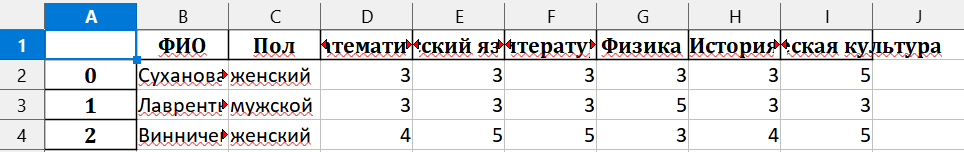

Название листа Sheet1

In [9]:
# избавимся от колонки индексов (как в исходном файле)
grades_6a.to_excel('saves/grades_no_index.xlsx', index=False)

In [10]:
# указать имя листа
grades_6a.to_excel('saves/grades_no_index.xlsx', index=False, sheet_name='6 А')

In [14]:
# когда мы сохраняем разные таблицы, остается последняя
grades_6a.to_excel('saves/all_grades.xlsx', index=False, sheet_name='6 А')
grades_6d.to_excel('saves/all_grades.xlsx', index=False, sheet_name='6 Д')
# читаем все листы
df = pd.read_excel('saves/all_grades.xlsx', sheet_name=None)
# увы, только последний лист в файле
df.keys()

dict_keys(['6 Д'])

### Сохранить несколько листов

In [15]:
# сохранить несколько листов
with pd.ExcelWriter('saves/all_grades.xlsx', mode='w') as writer:
    grades_6a.to_excel(writer, index=False, sheet_name='6 А')
    grades_6d.to_excel(writer, index=False, sheet_name='6 Д')

df = pd.read_excel('saves/all_grades.xlsx', sheet_name=None)
# ура, два листа
df.keys()

dict_keys(['6 А', '6 Д'])

In [16]:
# добавим еще один лист?
with pd.ExcelWriter('saves/all_grades.xlsx', mode='w') as writer:
    grades_6b.to_excel(writer, index=False, sheet_name='6 Б')

df = pd.read_excel('saves/all_grades.xlsx', sheet_name=None)
# увы, только последний лист
df.keys()

dict_keys(['6 Б'])

### Добавить еще один лист к существующим

Открываем файл в моде append.

In [17]:
# сохранить несколько листов
with pd.ExcelWriter('saves/all_grades.xlsx', mode='a') as writer:
    grades_6a.to_excel(writer, index=False, sheet_name='6 А')
    grades_6d.to_excel(writer, index=False, sheet_name='6 Д')

df = pd.read_excel('saves/all_grades.xlsx', sheet_name=None)
# все три класса. В том порядке, что добавляли
df.keys()

dict_keys(['6 Б', '6 А', '6 Д'])

## CSV

Только один лист!

In [19]:
# разделитель sep лучше оставьте по умолчанию!
grades_6a.to_csv('saves/6a.csv')

## JSON

In [20]:
grades_6b.to_json('saves/6b.json')

```json
{"\u0424\u0418\u041e":{"0":"\u0420\u044f\u0431\u043e\u0432 \u0410\u043b\u0435\u043a\u0441\u0430\u043d\u0434\u0440 \u0418\u0432\u0430\u043d\u043e\u0432\u0438\u0447","1":"\u041a\u043e\u0440\u043e\u0432\u0438\u043d \u0412\u044f\u0447\u0435\u0441\u043b\u0430\u0432 \u0414\u0435\u043d\u0438\u0441\u043e\u0432\u0438\u0447","2":"\u0413\u0440\u0438\u0433\u043e\u0440\u044c\u0435\u0432 \u0412\u043b\u0430\u0434\u0438\u0441\u043b\u0430\u0432 \u041e\u043b\u0435\u0433\u043e\u0432\u0438\u0447"},"\u041f\u043e\u043b":{"0":"\u043c\u0443\u0436\u0441\u043a\u043e\u0439","1":"\u043c\u0443\u0436\u0441\u043a\u043e\u0439","2":"\u043c\u0443\u0436\u0441\u043a\u043e\u0439"},"\u041c\u0430\u0442\u0435\u043c\u0430\u0442\u0438\u043a\u0430":{"0":3,"1":5,"2":4},"\u0420\u0443\u0441\u0441\u043a\u0438\u0439 \u044f\u0437\u044b\u043a":{"0":3,"1":4,"2":4},"\u041b\u0438\u0442\u0435\u0440\u0430\u0442\u0443\u0440\u0430":{"0":3,"1":3,"2":4},"\u0424\u0438\u0437\u0438\u043a\u0430":{"0":3,"1":5,"2":5},"\u0418\u0441\u0442\u043e\u0440\u0438\u044f":{"0":3,"1":3,"2":4},"\u0424\u0438\u0437\u0438\u0447\u0435\u0441\u043a\u0430\u044f \u043a\u0443\u043b\u044c\u0442\u0443\u0440\u0430":{"0":4,"1":5,"2":5}}
```

In [21]:
grades_6b.to_json('saves/6b.json', force_ascii=False)

```
{"ФИО":{"0":"Рябов Александр Иванович","1":"Коровин Вячеслав Денисович","2":"Григорьев Владислав Олегович"},"Пол":{"0":"мужской","1":"мужской","2":"мужской"},"Математика":{"0":3,"1":5,"2":4},"Русский язык":{"0":3,"1":4,"2":4},"Литература":{"0":3,"1":3,"2":4},"Физика":{"0":3,"1":5,"2":5},"История":{"0":3,"1":3,"2":4},"Физическая культура":{"0":4,"1":5,"2":5}}
```

In [22]:
# красиво, human readable
grades_6b.to_json('saves/6b.json', force_ascii=False, indent=4)

In [35]:
# сразу читаем json, чтобы показать его
import json
grades_6b.to_json('saves/6b.json', force_ascii=False, indent=4)
with open('saves/6b.json') as fin:
  data = json.load(fin)
  print(json.dumps(data, indent=4, ensure_ascii=False))

{
    "ФИО": {
        "0": "Рябов Александр Иванович",
        "1": "Коровин Вячеслав Денисович",
        "2": "Григорьев Владислав Олегович"
    },
    "Пол": {
        "0": "мужской",
        "1": "мужской",
        "2": "мужской"
    },
    "Математика": {
        "0": 3,
        "1": 5,
        "2": 4
    },
    "Русский язык": {
        "0": 3,
        "1": 4,
        "2": 4
    },
    "Литература": {
        "0": 3,
        "1": 3,
        "2": 4
    },
    "Физика": {
        "0": 3,
        "1": 5,
        "2": 5
    },
    "История": {
        "0": 3,
        "1": 3,
        "2": 4
    },
    "Физическая культура": {
        "0": 4,
        "1": 5,
        "2": 5
    }
}


### orient

  * columns (по умолчанию)
  * records - по строкам
  * table
  * split
  * values
  * index

In [36]:
# как вам дали исходный json на лабораторной
grades_6b.to_json('saves/6b.json', orient='records', force_ascii=False, indent=4)
with open('saves/6b.json') as fin:
  data = json.load(fin)
  print(json.dumps(data, indent=4, ensure_ascii=False))

[
    {
        "ФИО": "Рябов Александр Иванович",
        "Пол": "мужской",
        "Математика": 3,
        "Русский язык": 3,
        "Литература": 3,
        "Физика": 3,
        "История": 3,
        "Физическая культура": 4
    },
    {
        "ФИО": "Коровин Вячеслав Денисович",
        "Пол": "мужской",
        "Математика": 5,
        "Русский язык": 4,
        "Литература": 3,
        "Физика": 5,
        "История": 3,
        "Физическая культура": 5
    },
    {
        "ФИО": "Григорьев Владислав Олегович",
        "Пол": "мужской",
        "Математика": 4,
        "Русский язык": 4,
        "Литература": 4,
        "Физика": 5,
        "История": 4,
        "Физическая культура": 5
    }
]
